# Importing All the Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing import image

from os import rename, listdir
import os
import shutil, os
import splitfolders

In [154]:
print(tf.__version__)

2.8.0


# Importing the dataset


In [58]:
dataset = "D:/files/dataset/Task/images2"
labels = pd.read_csv("D:/files/dataset/Task/gicsd_labels.csv")
labels.isnull().sum()

IMAGE_FILENAME    0
 LABEL            0
dtype: int64

In [59]:
print(labels.head())


     IMAGE_FILENAME                 LABEL
0   GICSD_1_0_3.png      FULL_VISIBILITY 
1  GICSD_1_0_13.png      FULL_VISIBILITY 
2  GICSD_1_1_33.png   PARTIAL_VISIBILITY 
3  GICSD_1_1_53.png      FULL_VISIBILITY 
4  GICSD_1_2_73.png      FULL_VISIBILITY 


# Data preprocessing

In [60]:

label1 = labels.iloc[:,0].values
label2 = labels.iloc[:,1].values


# Renaming the files,categorizing and splitting the dataset

In [63]:
file_name = []
    
path = "D:/files/dataset/Task/images2"

files = os.listdir(path)  # storing the names in a list for refrence 
for f in files:
    file_name.append(f)

for x in range(5):
    print(label1[x],label2[x])
    
    
      
for x in range(len(label1)):      # this looping statment is used to rename the files for better picture
    if label1[x] in file_name:
        #print('hi')
        os.rename("D:/files/dataset/Task/images2/"+str(label1[x]),"D:/files/dataset/Task/images2/"+str(label2[x])+'-'+str(x)+'-.png')
        
        
os.chdir("D:/files/dataset/Task/images2/") 
for f in os.listdir():      # classfying the 3 class images to 3 different folders for that this for loop is used
    file_name,file_ext = os.path.splitext(f)
    f_title,f_num,f_null = file_name.split('-')
    f_title = f_title.strip()
    f_num = f_num.strip()
    #print('{}{}'.format(f_title,file_ext))
    new_name = '{}{}'.format(f_title,file_ext)
    if new_name == 'FULL_VISIBILITY.png':
        shutil.move(f, "D:/files/dataset/Task/categorised_data/full")
    elif new_name == 'NO_VISIBILITY.png':
        shutil.move(f, "D:/files/dataset/Task/categorised_data/none")
    elif new_name == 'PARTIAL_VISIBILITY.png':
        shutil.move(f, "D:/files/dataset/Task/categorised_data/half")
    
  

GICSD_1_0_3.png  FULL_VISIBILITY 
GICSD_1_0_13.png  FULL_VISIBILITY 
GICSD_1_1_33.png  PARTIAL_VISIBILITY 
GICSD_1_1_53.png  FULL_VISIBILITY 
GICSD_1_2_73.png  FULL_VISIBILITY 


In [66]:
input_folder = "D:/files/dataset/Task/categorised_data/"      # Here the dataset is splitted to training and testing dataset
splitfolders.ratio(input_folder,output = "D:/files/dataset/Task/split_dataset",
                  seed = 42 , ratio = (.7,.2,.1),
                  group_prefix = None)

Copying files: 800 files [00:01, 449.46 files/s]


# Preprocessing Training and Testing dataset

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [3]:

training_set = train_datagen.flow_from_directory("D:/files/dataset/Task/split_dataset/train",
                                                 target_size = (64, 64),          # (64,64) is working fine then another pixels
                                                 batch_size = 32,    # batch size 32 is working good here
                                                 class_mode = 'categorical')

Found 559 images belonging to 3 classes.


In [4]:
t_img , label = training_set.next()
t_img.shape                        # to check the images shape

(32, 64, 64, 3)

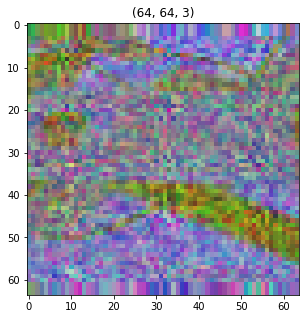

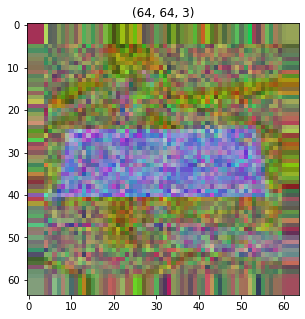

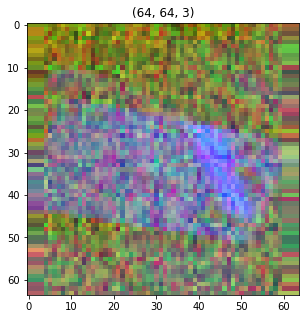

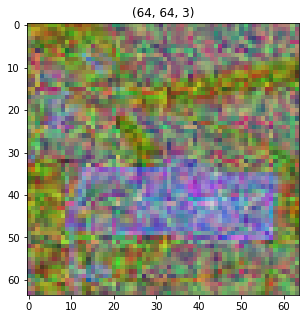

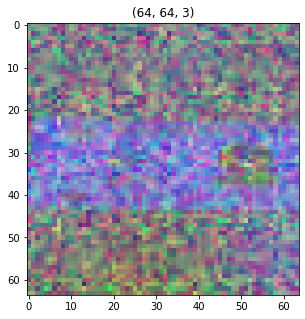

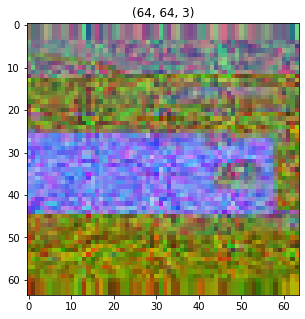

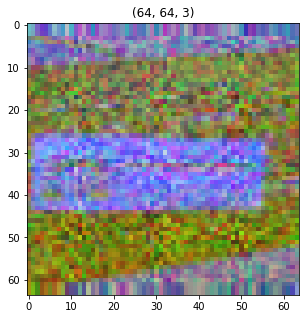

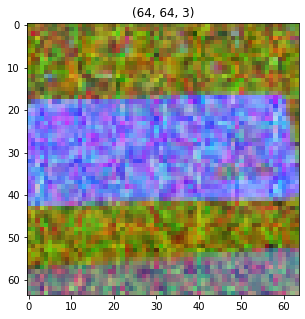

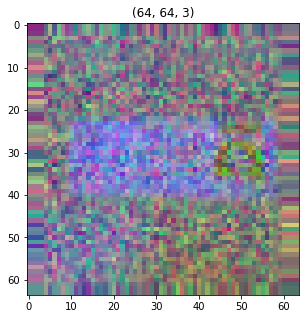

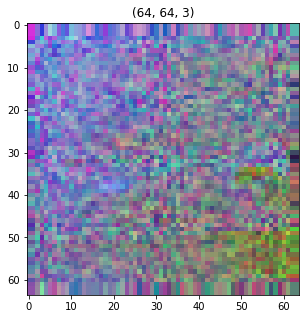

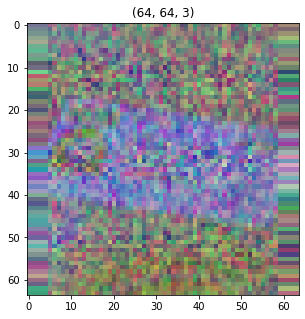

In [5]:
def plotImages(img_arr,label):             # to check how image is looking
    for idx , img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize = (5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis = False
            plt.show()
            
plotImages(t_img,label)

In [7]:
datagen = ImageDataGenerator(rescale = 1./255)   # dataset for validation
val = datagen.flow_from_directory("D:/files/dataset/Task/split_dataset/val",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 159 images belonging to 3 classes.


# Building the CNN

In [8]:
# building a linear stack of layers with the sequential model
cnn = tf.keras.models.Sequential()

# convolutional layer

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# flatten output of conv
cnn.add(tf.keras.layers.Flatten())


# hidden layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


# output layer
cnn.add(tf.keras.layers.Dense(units=3 , activation='softmax'))

# compiling the sequential model
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])


# training the model for 10 epochs
cnn.fit(x = training_set, validation_data = val, epochs = 15)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
18/18 [==============================] - ETA: 0s - loss: 0.6110 - accuracy: 0.7782WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001217F3C9558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [40]:
training_set.class_indices

{'full': 0, 'half': 1, 'none': 2}

# The Final model accuracy is around 84 percentage
# I have changed the values at the time of pre processing
# Changed the Epoch value , Feature scaling value
# Also changed the pooling
# Highest accuracy value what I got was around 90.5 pecentage with this dataset

# Testing an Image

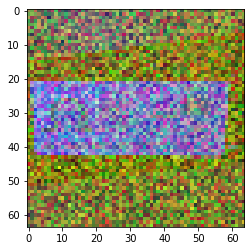

In [104]:
path = "D:/files/dataset/Task/split_dataset/test/full/ FULL_VISIBILITY -727-.png"
#path= "D:/files/dataset/Task/split_dataset/test/half/ PARTIAL_VISIBILITY -614-.png"
resized_image = tf.keras.utils.load_img(path,target_size = (64,64) )
img = plt.imshow(resized_image)

In [105]:
training_set.class_indices


{'full': 0, 'half': 1, 'none': 2}

In [106]:
test_image = image.load_img(path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)

[[1. 0. 0.]]


In [110]:
list_index = [0,1,2]
x = result
for i in range(len(list_index)):
    for j in range(len(list_index)):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
if list_index[0] == 0:
    print("full ID Card")
elif list_index[0] == 1:
    print('half ID Card')
elif list_index[0] == 2:
    print('no Id card')

full ID Card
